In [1]:
library(kernlab)

ERROR: Error in library(kernlab): there is no package called 'kernlab'


In [2]:
install.packages("kernlab",repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/samri/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'kernlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\samri\AppData\Local\Temp\RtmpkR0xhh\downloaded_packages


In [17]:
library(kernlab)


Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha



In [7]:
library(caret)

In [8]:
library(plyr)

In [10]:
# Read the data
FF <- read.csv(file.choose())

In [11]:
str(FF)

'data.frame':	517 obs. of  31 variables:
 $ month        : Factor w/ 12 levels "apr","aug","dec",..: 8 11 11 8 8 2 2 2 12 12 ...
 $ day          : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC         : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC          : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC           : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI          : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp         : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH           : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind         : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain         : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ dayfri       : int  1 0 0 1 0 0 0 0 0 0 ...
 $ daymon       : int  0 0 0 0 0 0 1 1 0 0 ...
 $ daysat       : int  0 0 1 0 0 0 0 0 0 1 ...
 $ daysun       : int  0 0 0 0 1 1 0 0 0 0 ...
 $ daythu       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ daytue       : in

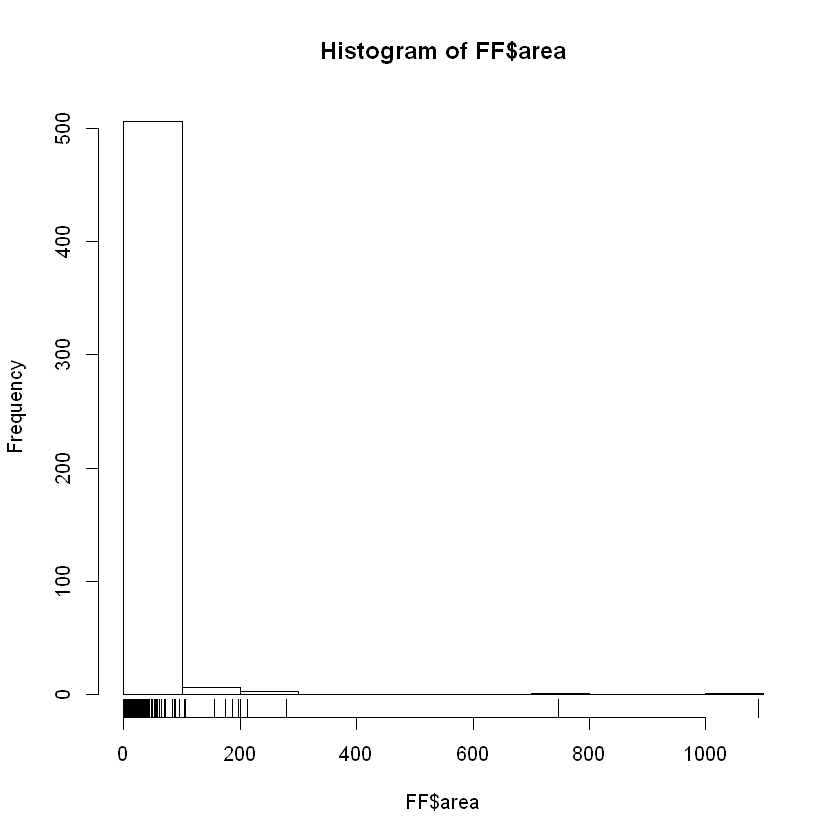

In [12]:
# The area value has lots of zeros

hist(FF$area)
rug(FF$area)

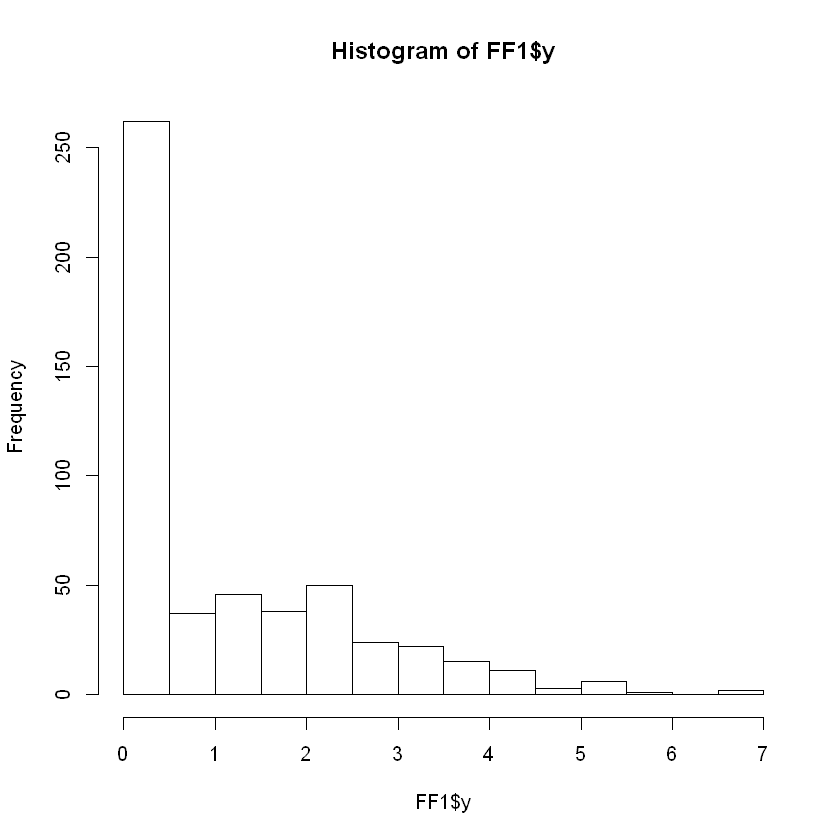

In [13]:
# Transform the Area value to Y 

FF1 <- mutate(FF, y = log(area + 1))  # default is to the base e, y is lower case
hist(FF1$y)


In [14]:
summary(FF) # Confirms on the different scale and demands normalizing the data.

     month      day          FFMC            DMC              DC       
 aug    :184   fri:85   Min.   :18.70   Min.   :  1.1   Min.   :  7.9  
 sep    :172   mon:74   1st Qu.:90.20   1st Qu.: 68.6   1st Qu.:437.7  
 mar    : 54   sat:84   Median :91.60   Median :108.3   Median :664.2  
 jul    : 32   sun:95   Mean   :90.64   Mean   :110.9   Mean   :547.9  
 feb    : 20   thu:61   3rd Qu.:92.90   3rd Qu.:142.4   3rd Qu.:713.9  
 jun    : 17   tue:64   Max.   :96.20   Max.   :291.3   Max.   :860.6  
 (Other): 38   wed:54                                                  
      ISI              temp             RH              wind      
 Min.   : 0.000   Min.   : 2.20   Min.   : 15.00   Min.   :0.400  
 1st Qu.: 6.500   1st Qu.:15.50   1st Qu.: 33.00   1st Qu.:2.700  
 Median : 8.400   Median :19.30   Median : 42.00   Median :4.000  
 Mean   : 9.022   Mean   :18.89   Mean   : 44.29   Mean   :4.018  
 3rd Qu.:10.800   3rd Qu.:22.80   3rd Qu.: 53.00   3rd Qu.:4.900  
 Max.   :56.100   Max.

In [15]:
# Prediction of Forest fires requires only prediction from 
# temperature, rain, relative humidity and wind speed

# Apply Normalization technique to the whole dataset :

normalize<-function(x){
  return ( (x-min(x))/(max(x)-min(x)))
}
FF$temp = normalize(FF$temp)
FF$RH   = normalize(FF$RH)
FF$wind = normalize(FF$wind)
FF$rain = normalize(FF$rain)

In [18]:
# We need to tweak this as a classification problem.lets base out the Size using this criteria :

attach(FF)
# Data Partition 
set.seed(123)
ind <- sample(2, nrow(FF), replace = TRUE, prob = c(0.7,0.3))
FF_train <- FF[ind==1,]
FF_test  <- FF[ind==2,]
# to train model
# e1071 package from LIBSVM library
# SVMlight algorithm klar package 

# kvsm() function uses gaussian RBF kernel 

# Building model 


model1<-ksvm(size_category~temp+rain+wind+RH, 
             data= FF_train,kernel = "vanilladot")

The following objects are masked from FF (pos = 4):

    area, day, dayfri, daymon, daysat, daysun, daythu, daytue, daywed,
    DC, DMC, FFMC, ISI, month, monthapr, monthaug, monthdec, monthfeb,
    monthjan, monthjul, monthjun, monthmar, monthmay, monthnov,
    monthoct, monthsep, rain, RH, size_category, temp, wind



 Setting default kernel parameters  


In [19]:
model1


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Linear (vanilla) kernel function. 

Number of Support Vectors : 199 

Objective Function Value : -184 
Training error : 0.247978 

In [20]:
Area_pred <- predict(model1, FF_test)

table(Area_pred,FF_test$size_category)

         
Area_pred large small
    large     0     0
    small    47    99

In [21]:
agreement <- Area_pred == FF_test$size_category
table(agreement)

agreement
FALSE  TRUE 
   47    99 

In [22]:
prop.table(table(agreement))

agreement
    FALSE      TRUE 
0.3219178 0.6780822 

In [23]:
# Different types of kernels 
# "rbfdot", "polydot", "tanhdot", "vanilladot", "laplacedot", 
# "besseldot", "anovadot", "splinedot", "matrix"

# kernel = rfdot 
model_rfdot<-ksvm(size_category~temp+rain+wind+RH, 
                  data= FF_train,kernel = "rbfdot")
pred_rfdot<-predict(model_rfdot,newdata=FF_test)
mean(pred_rfdot==FF_test$size_category) # 68.41

[1] 0.6849315

In [24]:
# kernel = vanilladot
model_vanilla<-ksvm(size_category~temp+rain+wind+RH, 
                    data= FF_train,kernel = "vanilladot")

 Setting default kernel parameters  


In [25]:
pred_vanilla<-predict(model_vanilla,newdata=FF_test)
mean(pred_vanilla==FF_test$size_category) # 67.80

[1] 0.6780822

In [26]:
# kernal = besseldot
model_besseldot<-ksvm(size_category~temp+rain+wind+RH, 
                      data= FF_train,kernel = "besseldot")

 Setting default kernel parameters  


In [27]:
pred_bessel<-predict(model_besseldot,newdata=FF_test)
mean(pred_bessel==FF_test$size_category) # 67.80

[1] 0.6780822

In [28]:
# kernel = polydot

model_poly<-ksvm(size_category~temp+rain+wind+RH, 
                 data= FF_train,kernel = "polydot")

 Setting default kernel parameters  


In [29]:
pred_poly<-predict(model_poly,newdata = FF_test)
mean(pred_poly==FF_test$size_category) # 67.80

[1] 0.6780822